In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv")
train_3 = train.iloc[ :,55:81]
train_3.info()
prices = train_3.SalePrice

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Functional     1460 non-null   object 
 1   Fireplaces     1460 non-null   int64  
 2   FireplaceQu    770 non-null    object 
 3   GarageType     1379 non-null   object 
 4   GarageYrBlt    1379 non-null   float64
 5   GarageFinish   1379 non-null   object 
 6   GarageCars     1460 non-null   int64  
 7   GarageArea     1460 non-null   int64  
 8   GarageQual     1379 non-null   object 
 9   GarageCond     1379 non-null   object 
 10  PavedDrive     1460 non-null   object 
 11  WoodDeckSF     1460 non-null   int64  
 12  OpenPorchSF    1460 non-null   int64  
 13  EnclosedPorch  1460 non-null   int64  
 14  3SsnPorch      1460 non-null   int64  
 15  ScreenPorch    1460 non-null   int64  
 16  PoolArea       1460 non-null   int64  
 17  PoolQC         7 non-null      object 
 18  Fence   

In [12]:
def process_label_feature(df, feature_name, mapping):
    feature = train_3[[feature_name, "SalePrice"]]
    print("Unique values of "+feature_name)
    unique = feature[feature_name].unique()
    print(feature[feature_name].value_counts())
    ax = sns.violinplot(data=[feature[feature[feature_name] == level]["SalePrice"].values
                   for level in mapping.keys() if level in unique], cut=0, inner='box')
    ax.set_title('House '+feature_name)
    ax.yaxis.grid(True)
    ax.set_xlabel(feature_name+'  Level')
    ax.set_ylabel('House Price')
    ax.set_xticklabels([s for s in mapping.keys() if s in unique])

##**Functional: Home functionality (Ruled out)**

Nearly all (i.e., 93.15%) have 'Typ' as Functional value. Also, through a violin plot, we see that
the correlations between Function and SalePrice are not significant.

Unique values of Functional
Unique values of Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64


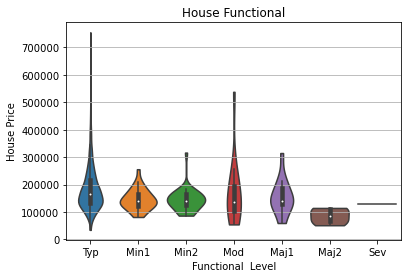

In [9]:
mapping_Functional = {'Typ': 0, 'Min1': 1, 'Min2': 2, 'Mod': 3, 'Maj1': 4,
                      'Maj2': 5, 'Sev': 6, 'Sal':7}
process_label_feature(train_3, "Functional", mapping_Functional)

##**Fireplaces: Number of fireplaces**

Clearly higher fireplaces number leads to higher price. While there are only 5 entries with 3 fireplaces
AND the mean and deviation of price distribution are similar where there are 2 or 3 fireplaces. Thus,
we will combine Fireplaces==3 into Fireplaces==2.

Unique values of Fireplaces
[0 1 2 3]
0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64


[Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')]

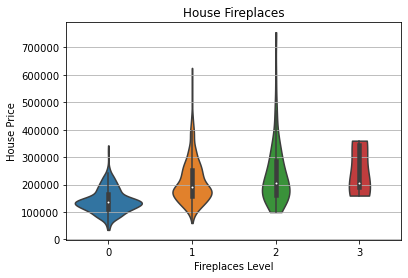

In [4]:
Fireplaces = train_3[["Fireplaces", "SalePrice"]]
print("Unique values of Fireplaces")
unique_Fireplaces = Fireplaces.Fireplaces.unique()
print(unique_Fireplaces )
print(Fireplaces.Fireplaces.value_counts())
ax = sns.violinplot(data=[Fireplaces[Fireplaces.Fireplaces == level]["SalePrice"].values
               for level in unique_Fireplaces], cut=0, inner='box')
ax.set_title('House Fireplaces')
ax.yaxis.grid(True)
ax.set_xlabel('Fireplaces Level')
ax.set_ylabel('House Price')
ax.set_xticklabels([0, 1, 2, 3])

##**Fireplaces: Number of fireplaces**

Clearly higher fireplace quality leads to higher price. NA and po, TA and GD may be combined.

Unique values of FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


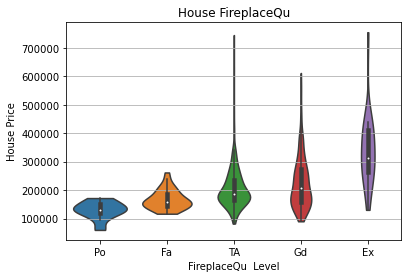

In [13]:
mapping_FireplaceQu = {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4,
                      'Ex': 5}
process_label_feature(train_3, "FireplaceQu", mapping_FireplaceQu)

#**Garage Series**
Features with unknown data are abandoned.
PCA will be applied on the remaining useful features.
##**GarageType: Garage location**
No NA value is in training data
There is an increasing trend of GarageTypes and SalePrice. Combination is required.

Unique values of GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Unique values of GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


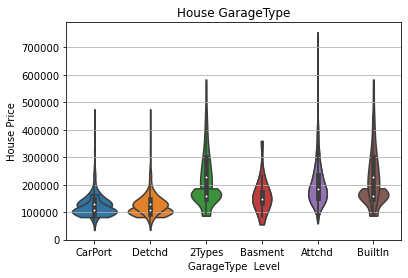

In [15]:
mapping_GarageType = {'NA': 0, 'Detchd': 1, 'CarPort': 2, 'BuiltIn': 3, 'Basment': 4,
                      'Attchd': 5, '2Types':6}
process_label_feature(train_3, "GarageType", mapping_GarageType)

Unique values of GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


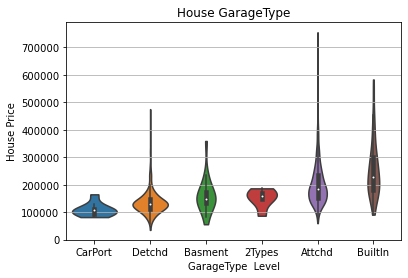

In [17]:
mapping_GarageType_revised = {'NA': 0, 'CarPort': 1, 'Detchd': 2, 'Basment': 3, '2Types': 4,
                      'Attchd': 5, 'BuiltIn':6}
process_label_feature(train_3, "GarageType", mapping_GarageType_revised)

##**GarageCars: Size of garage in car capacity**
0 1, 2 4 can be combined.

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64
Unique values of GarageCars
2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64


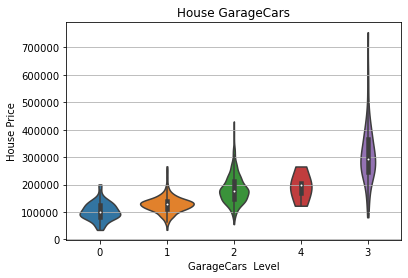

In [23]:
print(train_3["GarageCars"].value_counts())
mapping_GarageCars = {0:0,1:1,2:2,4:3,3:4}
process_label_feature(train_3, "GarageCars", mapping_GarageCars)


##**GarageArea:Size of garage in square feet**

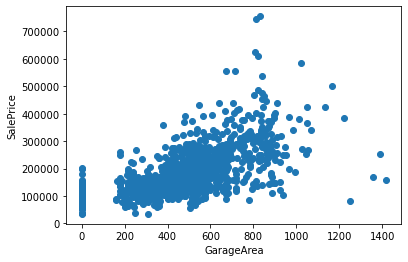

In [28]:
GarageArea = train_3[["GarageArea", "SalePrice"]].fillna(0)
plt.scatter(x=train_3.GarageArea, y=train_3.SalePrice)
plt.xlabel("GarageArea")
plt.ylabel("SalePrice")
plt.show()

##**GarageQual: Garage quality**
89.7% of this feature is TA. It may not be useful.

Unique values of GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64


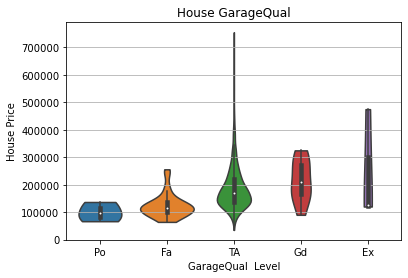

In [29]:
mapping_GarageQual = {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4,
                      'Ex': 5}
process_label_feature(train_3, "GarageQual", mapping_GarageQual)


##**GarageCond: Garage condition**
90.8% of this feature is TA. It may not be useful.

Unique values of GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


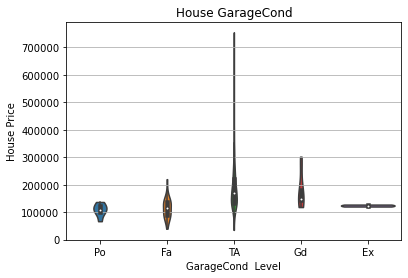

In [30]:
mapping_GarageCond = {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4,
                      'Ex': 5}
process_label_feature(train_3, "GarageCond", mapping_GarageCond)

##**PavedDrive: Paved driveway**

Unique values of PavedDrive
Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64


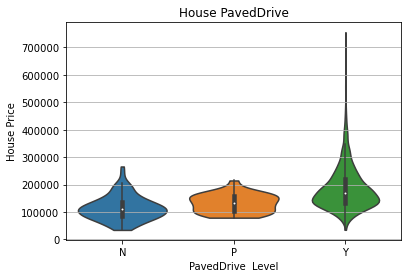

In [31]:
mapping_PavedDrive = {'N': 0, 'P': 1, 'Y': 2}
process_label_feature(train_3, "PavedDrive", mapping_PavedDrive)